### Task 04
#### Develop a **hand gesture recognition model** that can accurately identify and **classify** different hand gestures from image or video data enabling intuitive human-computer interaction and gesture-based control systems

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_leapgest_dataset(leapgest_path, img_size=128):
    images = []
    labels = []
    label_map = {
        "01_palm": 0,
        "02_l": 1,
        "03_fist": 2,
        "04_fist_moved": 3,
        "05_thumb": 4,
        "06_index": 5,
        "07_ok": 6,
        "08_palm_moved": 7,
        "09_c": 8,
        "10_down": 9
    }

    # Iterate over the main folders (00, 01, ..., 09)
    for main_folder in os.listdir(leapgest_path):
        main_folder_path = os.path.join(leapgest_path, main_folder)
        if os.path.isdir(main_folder_path):  # Check if it's a folder
            # Iterate over subfolders (e.g., 01_palm, 02_I, etc.)
            for gesture_folder in os.listdir(main_folder_path):
                gesture_path = os.path.join(main_folder_path, gesture_folder)
                if os.path.isdir(gesture_path):  # Check if it's a folder
                    # Get the label from the predefined label_map
                    if gesture_folder in label_map:
                        gesture_label = label_map[gesture_folder]
                    else:
                        print(f"Unknown gesture folder skipped: {gesture_folder}")
                        continue

                    # Load images from the gesture folder
                    for img_name in tqdm(os.listdir(gesture_path), desc=f"Loading {gesture_path}"):
                        img_path = os.path.join(gesture_path, img_name)
                        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Valid image extensions
                            try:
                                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                                if img is None:
                                    print(f"Invalid image file skipped: {img_path}")
                                    continue
                                img = cv2.resize(img, (img_size, img_size))
                                images.append(img)
                                labels.append(gesture_label)
                            except Exception as e:
                                print(f"Error loading image {img_path}: {e}")

    # Normalize images and convert to numpy arrays
    images = np.array(images, dtype=np.float32) / 255.0  # Scale pixel values to [0, 1]
    labels = np.array(labels, dtype=np.int32)

    print(f"Loaded {len(images)} images with {len(label_map)} unique gestures.")
    return images, labels, label_map

In [3]:
leapgest_path = "archive/leapgestRecog"
img_size = 128
images, labels, label_map = load_leapgest_dataset(leapgest_path, img_size)

print("Label Mapping:", label_map)

Loading archive/leapgestRecog\09\10_down: 100%|█████████████████████████████████████| 200/200 [00:01<00:00, 173.70it/s]


Loaded 20000 images with 10 unique gestures.
Label Mapping: {'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [4]:
# Create Reverse Label Map
reverse_label_map = {v: k for k, v in label_map.items()}

In [5]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

In [6]:
del images, labels

In [7]:
# Design the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_map), activation='softmax') 
])

In [8]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 205s 484ms/step - accuracy: 0.8219 - loss: 0.5290 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 155s 388ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9969 - val_loss: 0.0137
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 144s 361ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 4.1166e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 363ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9991 - val_loss: 0.0052
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 164s 410ms/step - accuracy: 0.9950 - loss: 0.0179 - val_accuracy: 0.9997 - val_loss: 8.6888e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 162s 405ms/step - accuracy: 1.0000 - loss: 2.1666e-05 - val_accuracy: 1.0000 - val_loss: 1.6613e-04
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 362ms/step - accuracy: 1.0000 - loss: 5.2780e-06 - val_accuracy: 1.0000 - val_loss: 9.7902e-05
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 183s 456ms/s

In [10]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 1.0000 - loss: 4.8151e-04
Test Accuracy: 0.9998


125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step

Classification Report:
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       400
         02_l       1.00      1.00      1.00       400
      03_fist       1.00      1.00      1.00       400
04_fist_moved       1.00      1.00      1.00       400
     05_thumb       1.00      1.00      1.00       400
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       400
08_palm_moved       1.00      1.00      1.00       400
         09_c       1.00      1.00      1.00       400
      10_down       1.00      1.00      1.00       400

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



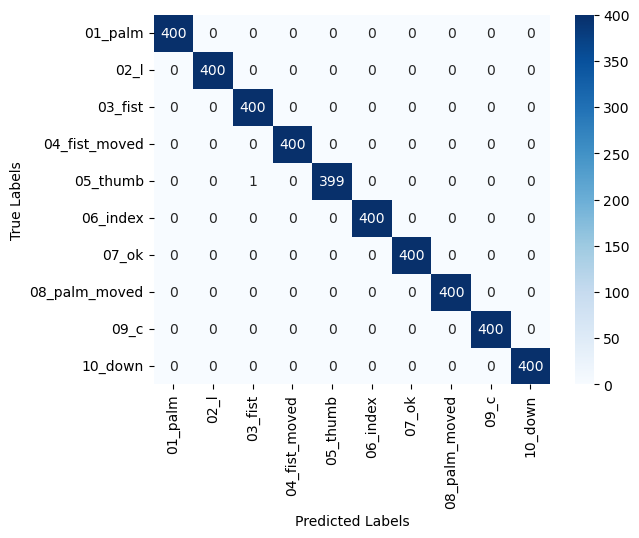

In [11]:
# Classification Report and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1).numpy()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_map.keys()))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

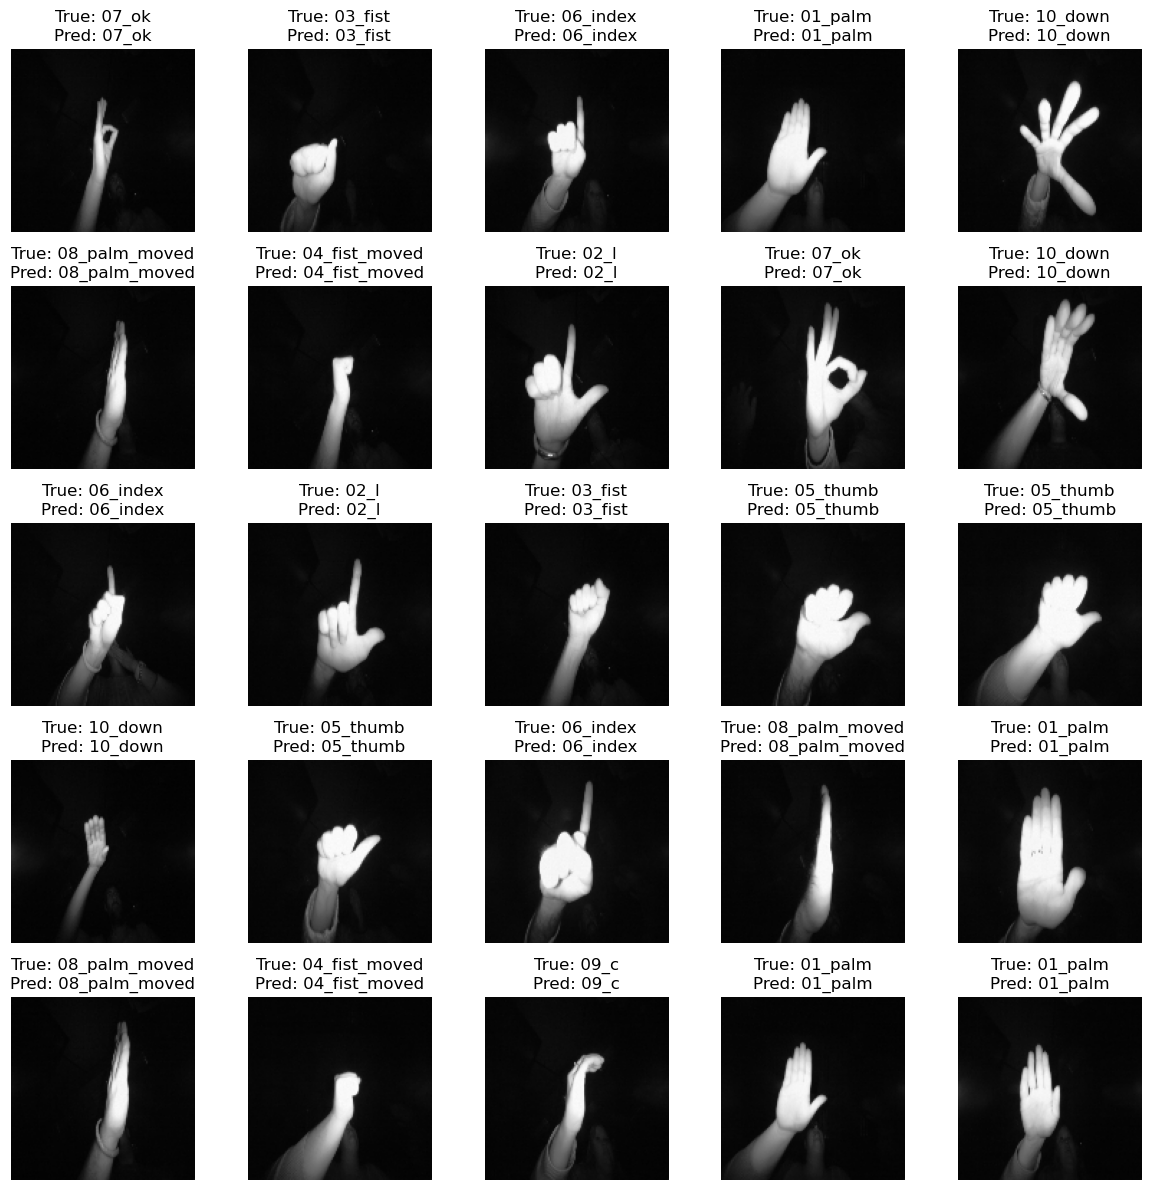

In [12]:
plt.figure(figsize=(12, 12))  # Create a larger figure
for i in range(25):  # Display the first 25 images
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid
    plt.imshow(X_test[i])  # Display the test image
    plt.title(f"True: {reverse_label_map[y_test[i]]}\nPred: {reverse_label_map[y_pred_labels[i]]}")  # Show true and predicted labels
    plt.axis("off")  # Hide axis
plt.tight_layout()  # Ensure no overlap
plt.show()